In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 

## Figure 6: approximation ratio of all possible cuts in Max-Cut

[]

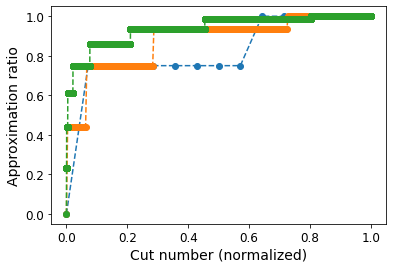

In [2]:
fig, ax = plt.subplots()
N=2
for n in range(1,4):
    N *= 2
    x_axis =np.linspace(0, 1., num=(2**(N)-1))
    y_list=[]
    for k in range(1, N+1):
        n_choices = math.factorial(N)/(math.factorial(k)*math.factorial(N-k))
        for m in range(int(n_choices)):
            y_list.append(k*(N-k)/(N**2/4.))
    y_list= np.sort(y_list)
    ax.plot(x_axis,y_list,'o--')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Cut number (normalized)", fontsize=14)
ax.set_ylabel("Approximation ratio", fontsize=14)
plt.plot()

# Figure 7: Max-4-Cut approximation ratio evolution

In [3]:
from Puffin import arctica
import Puffin

`puffin.py` is the file from which are simulated the results for Fig.7. To generate data, simply call the function `puffin.py`. 

Note: The code has been written to run on GENCI HPC Occigen, a super-computer. Running it locally on your PC will take several hours. You can however run a test for one graph by changing the parameters inside of `puffin.py`.

In [ ]:
arctica.main('MIS')

In [ ]:
arctica.main("MKC_P")

The generated data is stored in the repository `MKC_simulations`. We can now plot the figure:

In [7]:
import pathlib
import json

In [10]:
def main():
    j = 0
    data = []
    cost_fig1 = []
    for i in range(100):
        filepath = 'Puffin/puffin_data/MKC_simulations/final_Unif_' + ''.join(str(i)) + '.txt'
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data.append(json.loads(line))
        filepath = 'Puffin/puffin_data/MKC_simulations/final_Poisson_' + ''.join(str(i)) + '.txt'
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data.append(json.loads(line))
    return data

def plot_maxcut():
    costy_main = []
    cost_main = main()
    for i in range(len(cost_main)):
        costy_main.append(cost_main[i][0])


    cost = np.array(costy_main)
    data = []
    for i in range(7):
        data.append(cost[:,i])

    pos = [i+1 for i in range(7)]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    ax.plot([i for i in range(9)],[0.850304 for i in range(9)],'--',color='grey')
    ax.violinplot(data, pos, points=100, widths=0.5,
                          showmeans=False, showextrema=True, showmedians=True,
                          bw_method='silverman')
    plt.text(6.2, 0.84, 'classical worst-case', color='grey', fontsize=14 )
    ax.set_xlabel('Depth', fontsize=14)
    ax.set_ylabel('Approximation ratio', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


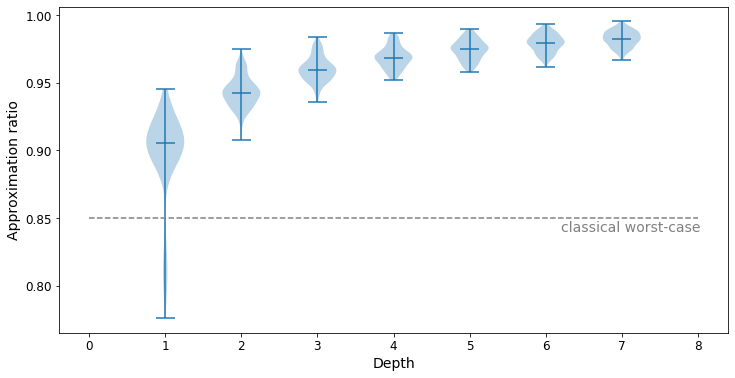

In [11]:
plot_maxcut()

# Figure 8:  MIS

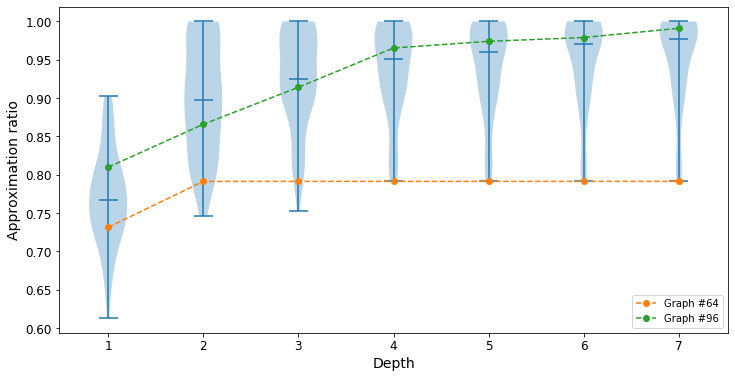

In [12]:
def get_data():
    j = 0
    data = [[0 for i in range(7)] for i in range(200)]
    cost_fig1 = []
    for i in range(200):
        filepath = "Puffin/puffin_data/MIS_simulations/MIS_final_" + ''. join(str(i)) +".txt"
        file = pathlib.Path(filepath)
        if file.exists ():
            with open(filepath) as fp:
                for line in fp:
                    data[i] = json.loads(line)
    
    return data

cost = get_data()
true_cost = []
for c in cost:
    if c != [0, 0, 0, 0, 0, 0, 0]:
        true_cost.append(c)
costa = np.array(true_cost)
pos = [i+1 for i in range(7)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.violinplot(costa, pos, points=40, widths=0.4,
                      showmeans=False, showextrema=True, showmedians=True,
                      bw_method='silverman')
ax.set_xlabel('Depth', fontsize=14)
ax.set_ylabel('Approximation ratio', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
for f in [64,96]:
    plt.plot([i+1 for i in range(7)],cost[f],'o--' ,label='Graph #%i' %f)
plt.legend(loc="lower right")
plt.show()